In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name=='nt':
    font_family="Magun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
sy=pd.Series(iris.target,dtype="category")
sy=sy.cat.rename_categories(iris.target_names)
df['species']=sy
cols=iris.feature_names
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
selector=VarianceThreshold()
selector.fit(df[cols])
print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [7]:
selector.set_params(threshold=0.6)
v_sel=selector.fit_transform(df[cols])
print(selector.variances_)
print(selector.get_support())

[0.68112222 0.18871289 3.09550267 0.57713289]
[ True False  True False]


In [8]:
iris_sel_df=df.iloc[:,[0,2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [9]:
iris_sel_df=pd.concat([iris_sel_df,df[['species']]],axis=1)
iris_sel_df.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
cor=df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


findfont: Font family ['Magun Gothic'] not found. Falling back to DejaVu Sans.


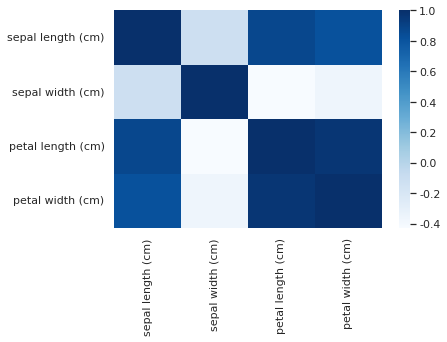

In [12]:
sns.heatmap(cor,annot=False,cmap=plt.cm.Blues)
plt.show()

In [13]:
cor_target=abs(cor['sepal length (cm)'])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [14]:
cor_target[cor_target>0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [15]:
selected_cols=cor_target[cor_target>0.6]
print("상관관계 계수 > 0.6인 속성")
print(selected_cols)

상관관계 계수 > 0.6인 속성
sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [16]:
selected_cols.index

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [17]:
df[selected_cols.index].head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [18]:
df_cor_sel=df[selected_cols.index]
df_cor_sel.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
